# D209 Performance Assessment - Classification Analysis

**Name:** Coots, Anthony.  
**Affiliation:** Grad Student M.Sc Data Analytics. <br />
**Date:** `2024-04-28`  
**Version:** 1.0.7

## Table of Contents:
- [Research Question](#Research-Question)
    - [Proposal of Question](#Proposal-of-Question)
    - [Defined Goal](#Defined-Goal)
- [Method Justification](#Method-Justification)
    - [Explanation of Classification Method](#Explanation-of-Classification-Method)
    - [Summary of Method Assumption](#Summary-of-Method-Assumption)
    - [Packages or Libraries List](#Packages-or-Libraries-List)
- [Data Preparation](#Data-Preparation)
    - [Data Preprocessing](#Data-Preprocessing)
    - [Data Set Variables](#Data-Set-Variables)
    - [Steps for Analysis](#Steps-for-Analysis)
    - [Cleaned Data Set](#Cleaned-Data-Set)
- [Analysis](#Analysis)
    - [Splitting the Data](#Splitting-the-Data)
    - [Output and Intermediate Calculations](#Output-and-Intermediate-Calculations)
    - [Code Execution](#Code-Execution)
- [Data Summary and Implications](#Data-Summary-and-Implications)
    - [Accuracy and AUC](#Accuracy-and-AUC)
    - [Results and Implications](#Results-and-Implications)
    - [Limitation](#Limitation)
    - [Course of Action](#Course-of-Action)
- [Demonstration](#Demonstration)
    - [Panopto Recording](#Panopto-Recording)
    - [Sources for Third-Party Code](#Sources-for-Third--Party-Code)
    - [Sources](#Sources)

## Research Question<a name="Research-Question"></a>

### A1: Proposal of Question <a name="Proposal-of-Question"></a>

**Question**: "*Of the demographic factors, medical conditions and hospital services features/predictors available in the dataset, how well can the k-nearest neighbor (KNN) algorithm predict patient readmissions (ReAdmis) target/response variable*?"

### A2: Defined Goal <a name="Defined-Goal"></a>

**Goal**: The goal of this data analysis is to use the classification method, k-nearest neighbor (KNN), to predict the outcome of readmission represented by the data set variable, ReAdmis. This model will use demographic factors (such as age and gender), medical conditions (including chronic back pain and diabetes), and hospital services (like initial admission type and provided services). We will validate the model using accuracy and **A**rea **U**nder the ROC **C**urve (AUC) metrics. The insight gained from this analysis has the goal in mind to be presented to healthcare stakeholders to facilitate potential policy changes and administrative practices to assist mitigating readmission rates.

## Method Justification<a name="Method-Justification"></a>

### B1: Explanation of Classification Method <a name="Explanation-of-Classification-Method"></a>

**How**: KNN is used to predict the classification of a data point in a data space by looking for the k closest data points and their classification. For example, if k is 4, seen in the image below then the 4 blue dots will determine that data point to be blue. If k is 9, the 4 blue data points are considered however there are 5 red data points and the classification for the data point is thus, red. This will be the case for readmission. If the blue dots represent readmission and the red dots represent no readmission then depending on k, the classification of the data point (green) will depend on the k-nearest neighbors. KNN uses distance measures which may vary between *Euclidean*, *Manhattan* and more measures. *Euclidean* is the most common distance metric for KNN. 

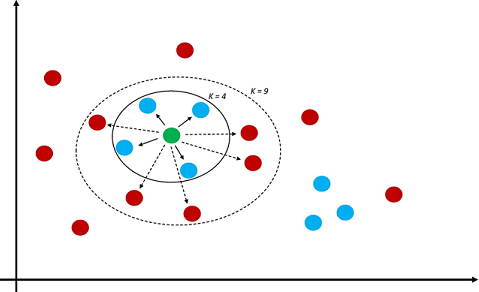

(Musolf et al., 2021)

**Expected Outcomes Specified**:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The application of the classification method to predict hospital readmission expects the following outcomes:

**High Prediction Accuracy**: Of the expected outcomes, one is for a high rate between the model predictions and the actual outcomes/instances in the data set. This can be verified with both accuracy and the AUC score to assume this expectation and validate the model's performances. The aim is at least 95% without overfitting or underfitting the model.

**Interpretable Results**: The classification method, KNN is known for its simplicity meaning we expect that the results provide good reasoning for each prediction which is absolutely essential for both technical and non-technical stakeholders to establish trust and insight.

**Validated Model**: Using cross-validation, there is an expectation to validate the model's performance and adjust the k value and/or distance metric as necessary. Consistent validation of the model grants the model to remain accurate over time while adapting to new data and thus should start out accurate.

### B2: Summary of Method Assumption <a name="Summary-of-Method-Assumption"></a>

**Assumption**: "*...similar things exist in proximity to each other.*" (D209 Data Mining 1 Task 1 Cohort, WGU Course Resource)

**Summary of Assumption**: The KNN algorithm assumes that the data points with similar features are to be located closer to one another in a feature space. KNN uses distance measures *Euclidean* or *Manhattan* to calculate the proximity between these points. The assumption more specifically states that the closer the two points are in this feature space, the more likely they are to share a similar classification, in this instance if a patient has been readmitted or not based on the selected features. This ultimately with a selected numerical feature, k, to choose the amount of nearest neighbors/data points in the feature space then classifies the observed data point based on the class dominance of these neighbors. For example, note that no analysis has been done yet however if many patients have a true identification of the Diabetes classifications and additionally they have a true identification of the Anxiety classifications then these data points are to be in closer proximity to one another than say the true identification of the Diabetes classifications and additionally the false identification of the Anxiety classifications in the feature space. At least, that is the assumption.

### B3: Packages or Libraries List <a name="Packages-or-Libraries-List"></a>

**Packages or Libraries List**:

- *matplotlib.pyplot* is used in order to show visuals as necessary for interpretability through out the analysis.

- *numpy* is used to save data in lists in order to analyze a given feature, for example, saving a k value and it's respective accuracy score to find the optimal k. Think arrays and matrices.

- *os* used to read the current working directory, needed to properly place/locate files.

- *pandas* used to store data sets as files, csv usually to data sets for Python analysis and data manipulation.

- *sklearn.feature_selection: SelectKBest, f_classif* are used for feature selection, this helps identify which features have a significant relationship with the target. SekectKBest selects the top k features according to correlation based on a test stat f_classif.

- *sklearn.metrics: accuracy_score, auc, confusion_matrix, roc_auc_score, roc_curve* are used to compute the model's performance metrics. Accuracy_score will calculate the overall accuracy of the model, while auc and roc_auc_score compute the AUC of the ROC curve for the model's ability to identify for each classification of the target variable. confusion_matrix provides a summary of the true positives, true negatives, false positives and false negatives.

- *sklearn.model_selection: cross_val_score, train_test_split* are used for splitting the data set into training and test data sets and evaluating the model using the cross-validation technique, assessing the model's performance given the features.

- *sklearn.neighbors: KNeighborsClassifier*: Is used to create instances of the KNN algorithm for the train data set.

- *sklearn.preprocessing: StandardScaler* is used to scale the features data which is imperative for the KNN algorithm and distance calculations. This ensures that all features contribute on an equal plane preventing larger scales from overwritting the distance calculations.

In [54]:
# Imports of libraries/methods used for analysis

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

## Data Preparation<a name="Data-Preparation"></a>

### C1: Data Preprocessing <a name="Data-Preprocessing"></a>

**Goal**: Data preprocessing has several techniques to prepare the data in a format ready for analysis. Below is one of the techniques described:

- KNN is of a distance-based algorithm, scaling/standardizing are methods used to improve model accuracy. If features are not scaled appropriately, the distances used in the algorithm may be skewed and reduce the model's full accuracy potential when classifying a patients data point of whether they would be readmitted or not. 

### C2: Data Set Variables <a name="Data-Set-Variables"></a>

**Question**: "*Of the demographic factors, medical conditions and hospital services features/predictors available in the dataset, how well can the k-nearest neighbor (KNN) algorithm predict patient readmissions (ReAdmis) target/response variable*?"

**Initial Data Set**: The question aims to see how well KNN can predict the readmission of patients with demographic factors, medical conditions and hospital services. Therefore we will hand pick variables from each group of factors in order to facilitate the classification method. Note some variables are dismissed as they are irrelevant to the analysis such as CaseOrder or Customer_id and more general features are selected such as "Anxiety", "Gender" and "Services". The following groups have the hand picked variables:

**Demographic Factors**:

- *Age*, numeric.
- *Children*, numerical.
- *Gender*, categorical.

**Medical Conditions**:

- *Anxiety*, categorical.
- *Diabetes*, categorical.
- *HighBlood*, categorical.
- *Overweight*, categorical.
- *VitD_levels*, numeric.

**Hospital Services**:

- *Additional_charges*, numeric.
- *Complication_risk*, categorical.
- *Doc_visits*, numeric.
- *Initial_admin*, categorical.
- *Initial_days*, numeric.
- *Services*, categorical.
- *TotalCharge*, numeric.

**Target Variable**:

- *ReAdmis*, categorical.

### C3: Steps for Analysis <a name="Steps-for-Analysis"></a>

**Steps**: The steps used to prepare the data are outlined below:

- *Load the data into a DataFrame*
- *View the data*
- *Evaluate the data structures and data types*
- *Remove the null values, missing data, outliers*
- *Convert categorical variables, dummy encoding, ordinal encoding*
- *Scale the features as KNN's relies on the distance calculations*
- *Select features using SelectKBest from sklearn to improve model efficiency*

**NOTE**: The removal missing data/outliers may not occur. It is best to perform a simple check regardless for missing values. Removal of outliers is most likely not necessary as the data cleaning phase has been addressed from course D206 and thus will be disregarded to prevent overcleaning/distortion of the data set's authenticity.

Before we start with explanation of steps and the code preparation, we will first load the data set CSV to a pandas DataFrame. More on this in [B3: Packages or Libraries List](#Packages-or-Libraries-List)

**Load the Data into a DataFrame**: The data set comes in a CSV file, "medical_clean.csv". The data in this CSV file is to be loaded into a DataFrame to start the process. This is done with Python's library pandas.

In [55]:
# What is my current working directory?
print("\nCurrent Working Directory: " + os.getcwd() + '\n')

# Read csv into data frame.
df = pd.read_csv("medical_clean.csv")


Current Working Directory: C:\Users\antho\Downloads



**View the Data**: Under the hood, the variables have data types that may need to be reassessed along with seeing if missing data is present. These changes wont take effect until later, but we can view the DataFrame to get an idea.

In [56]:
# Output the variables and the data types in the DataFrame.
summary = pd.DataFrame({
    "Variable": df.columns,
    "Missing Count": df.isna().sum(),
    "Data Type": df.dtypes}).reset_index(drop = True)

# Display summary of the DataFrame.
summary

,Variable,Missing Count,Data Type
0,CaseOrder,0,int64
1,Customer_id,0,object
2,Interaction,0,object
3,UID,0,object
4,City,0,object
5,State,0,object
6,County,0,object
7,Zip,0,int64
8,Lat,0,float64
9,Lng,0,float64


*Visualized is the variables and the DataFrame data type for each and the count of missing values*.

**Evaluate the Data Structures and Data Types**: The visuals in the step before give us the variables, their data types and their count for missing values. There are some data types that should probably change (e.g., Diabetes which is an Object, should probably be a boolean.) These conversions are done below:

In [57]:
# Object columns, that should be boolean.
obj_bool_cols = ["ReAdmis", "Soft_drink", "HighBlood",
                 "Stroke", "Overweight", "Arthritis",
                 "Diabetes", "Hyperlipidemia", "BackPain",
                 "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis",
                 "Asthma"]

# Iteratively loop through (Yes, No) object columns and make them (1, 0) int columns, respectively.
for col in obj_bool_cols:
    boolean_dict = {str(col): {"No": 0, "Yes": 1}}
    df.replace(boolean_dict, inplace = True)
    df[col] = df[col].astype('bool')

In [58]:
# Output the variables and the data types in the DataFrame.
summary = pd.DataFrame({
    "Variable": df.columns,
    "Missing Count": df.isna().sum(),
    "Data Type": df.dtypes}).reset_index(drop = True)

# Display summary of the DataFrame.
summary

,Variable,Missing Count,Data Type
0,CaseOrder,0,int64
1,Customer_id,0,object
2,Interaction,0,object
3,UID,0,object
4,City,0,object
5,State,0,object
6,County,0,object
7,Zip,0,int64
8,Lat,0,float64
9,Lng,0,float64


**Remove the Null Values, Missing Data, Outliers**: Usually this step is for removing the null values/missing data or imputating for those observations, however in our case there is no null values/missing data and the outliers will be left alone should they exist as over adjusting for outliers that were already addressed in the data cleaning phase, D206, would distort the data set. 

**Convert Categorical Variables, Dummy Encoding, Ordinal Encoding**: Next, the categorical variables should be appropriately encoded where necessary. For example, complication risk comes as "Low", "Medium" and "High" should be ordinally encoded as 1, 2 and 3, respectively. Additionally, the Gender variable contains values "Male", "Female" and "Nonbinary" and thus will have their own appropriate dummy variables as encoded. This will make use of dictionary translations for ordinal encoding and pandas get_dummies call to make the new variables.

In [59]:
# We wont waste time encoding variables that are not used in the analysis, rather, we will encode/create
# dummy variables for the variables used in the analysis as defined in C2.
catg_cols = ["Anxiety", "Complication_risk", "Diabetes", "Gender",
             "HighBlood", "Initial_admin", "Overweight", "Services"]

# Ordinal columns.
ordi_cols = ["Complication_risk"]

# Nominal columns.
nomi_cols = ["Anxiety", "Diabetes", "Gender", "HighBlood", 
             "Initial_admin", "Overweight", "Services"]

df_cat = df[catg_cols].copy()

In [60]:
# Ordinal encoding.

# Dictionary.
dict = {"Complication_risk": {"Low": 1, "Medium": 2, "High": 3}}

# Call to dictionary to replace values numerically.
df_cat.replace(dict, inplace = True)

In [61]:
# Creating dummy variables.

# Dummy variables.
dummy_cols = ["Gender", "Initial_admin", "Services"]

# Pandas get_dummies method.
df_cat = pd.get_dummies(df_cat, columns = dummy_cols, drop_first = True)

In [62]:
df_cat.head(5)

,Anxiety,Complication_risk,Diabetes,HighBlood,Overweight,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Services_CT Scan,Services_Intravenous,Services_MRI
0,True,2,True,True,False,True,False,True,False,False,False,False
1,False,3,False,True,True,False,False,True,False,False,True,False
2,False,2,True,True,True,False,False,False,False,False,False,False
3,False,2,False,False,False,True,False,False,False,False,False,False
4,False,1,False,False,False,False,False,False,False,True,False,False


*Time to add these columns back to the original DataFrame.*

In [63]:
# Rename columns.
df_cat = df_cat.rename(
    columns = {
                "Initial_admin_Emergency Admission": "Initial_admin_Emergency_Admission",
                "Initial_admin_Observation Admission": "Initial_admin_Observation_Admission",
                "Services_CT Scan": "Services_CT_Scan"
              }
                      )

dummy_cols = ["Initial_admin_Emergency_Admission",
              "Initial_admin_Observation_Admission",
              "Services_CT_Scan"]

In [64]:
# Remove the pre-conversion categorical variables.
df.drop(catg_cols, axis = 1, inplace = True)

In [65]:
# Add the post-conversion categorical variables.
df_num = df.copy()
df = pd.concat([df_num, df_cat], axis = 1)

**Scale the Features as KNN's Relies on the Distance Calculations**: Scaling is generally applied to numeric variables to guarantee that they all contribute equally to the distance calculations that are performed in the algorithm. Scaling is applied to make sure no one feature is dominant in the distance calculation by removing the mean and scaling to the unit variance. If the numeric variables are on different scales, a variable that has much larger values can influence the outcome of these calculations in a significantly biased manner. The following code implements sklearns preprocessing method called "StandardScaler". Mentioned in [B3: Packages or Libraries List](#Packages-or-Libraries-List), Python library sklearn preprocessing module gives access to StandardScaler tools to handle the scaling processes necessary.

In [66]:
# Initial data set numeric variables.
num_cols = ["Additional_charges", "Age", "Children", "Doc_visits",
            "Initial_days", "TotalCharge", "VitD_levels"]

# New DataFrame specific for scaling numeric variables.
df_num = df[num_cols].copy()

# Next, scale the data set loaded into the numeric variables DataFrame df_num.

# Instance of the StandardScaler.
standard_scaler = StandardScaler()

# Fit the instance to the data in the df_num_normalized DataFrame and scale.
arr_num_scaled = standard_scaler.fit_transform(df_num)

# Convert the array to a DataFrame.
df_num_scaled = pd.DataFrame(arr_num_scaled, columns = num_cols)

In [67]:
# Concat the before scale and after scale DataFrames.
df_comp = pd.concat([df_num, df_num_scaled], axis = 1)

# Display to compare.
df_comp.head(10)

,Additional_charges,Age,Children,Doc_visits,Initial_days,TotalCharge,VitD_levels,Additional_charges,Age,Children,Doc_visits,Initial_days,TotalCharge,VitD_levels
0,17939.403420,53,1,6,10.585770,3726.702860,19.141466,0.765005,-0.024795,-0.507129,0.944647,-0.907310,-0.727185,0.583603
1,17612.998120,51,3,4,15.129562,4193.190458,18.940352,0.715114,-0.121706,0.417277,-0.967981,-0.734595,-0.513228,0.483901
2,17505.192460,53,3,4,4.772177,2434.234222,18.057507,0.698635,-0.024795,0.417277,-0.967981,-1.128292,-1.319983,0.046227
3,12993.437350,78,0,4,1.714879,2127.830423,16.576858,0.009004,1.186592,-0.969332,-0.967981,-1.244503,-1.460517,-0.687811
4,3716.525786,22,1,5,1.254807,2113.073274,17.439069,-1.408991,-1.526914,-0.507129,-0.011667,-1.261991,-1.467285,-0.260366
5,12742.589910,76,3,6,5.957250,2636.691180,19.612646,-0.029338,1.089681,0.417277,0.944647,-1.083245,-1.227125,0.817193
6,16815.513600,50,0,6,9.058210,3694.627161,14.751687,0.593216,-0.170161,-0.969332,0.944647,-0.965374,-0.741896,-1.592646
7,6930.572138,40,7,7,14.228019,3021.499039,19.688673,-0.917717,-0.654716,2.266090,1.900960,-0.768863,-1.050631,0.854884
8,8363.187290,48,0,6,6.180339,2968.402860,19.653320,-0.698739,-0.267072,-0.969332,0.944647,-1.074766,-1.074983,0.837357
9,26225.989910,78,2,7,1.632554,3147.855813,18.224324,2.031627,1.186592,-0.044926,1.900960,-1.247632,-0.992676,0.128927


*The numeric variables have now been scaled appropriately.*

In [68]:
# Make new scaled DataFrame replacing the before scale variables.
df_scaled = df.drop(columns = num_cols)

# Add the newly scaled variables.
df = pd.concat([df_scaled, df_num_scaled], axis = 1)

**Select Features Using SelectKBest from sklearn to Improve Model Efficiency**: This step will take our initial variables in the data set and use SelectKBest, a sklearn method in order to improve the efficiency of the model. First, by creating a data set with the hand picked variables and then selecting the final list of variables by feature score. See the following code:

In [69]:
X = df[["Additional_charges", "Age", "Anxiety", "Children",
        "Complication_risk", "Diabetes", "Doc_visits", "Gender_Male",
        "Gender_Nonbinary", "HighBlood", "Initial_admin_Emergency_Admission",
        "Initial_admin_Observation_Admission", "Initial_days", "Overweight",
        "Services_CT_Scan", "Services_Intravenous", "Services_MRI", "TotalCharge",
        "VitD_levels"]]

y = df["ReAdmis"]

select_k = SelectKBest(score_func = f_classif, k = "all")

select_k.fit(X, y)

features_scores = pd.DataFrame({"Feature/Variable": X.columns, "Score": select_k.scores_, "pvalue": select_k.pvalues_})
features_scores = features_scores.sort_values(by = "pvalue")

features_scores

,Feature/Variable,Score,pvalue
17,TotalCharge,24702.017106,0.000000
12,Initial_days,26222.105595,0.000000
14,Services_CT_Scan,5.953342,0.014707
3,Children,5.539285,0.018613
15,Services_Intravenous,4.126915,0.042233
10,Initial_admin_Emergency_Admission,3.884325,0.048766
1,Age,2.499820,0.113891
0,Additional_charges,1.854971,0.173237
11,Initial_admin_Observation_Admission,1.433252,0.231263
7,Gender_Male,0.962765,0.326515


In [70]:
features_scores[features_scores.pvalue < 0.05]

,Feature/Variable,Score,pvalue
17,TotalCharge,24702.017106,0.000000
12,Initial_days,26222.105595,0.000000
14,Services_CT_Scan,5.953342,0.014707
3,Children,5.539285,0.018613
15,Services_Intravenous,4.126915,0.042233
10,Initial_admin_Emergency_Admission,3.884325,0.048766


*The TotalCharge and Initial_days columns have a very high score, these features seem to be more important for predicting readmission.*

In [71]:
X = df[["TotalCharge", "Initial_days", "Services_CT_Scan",
        "Children", "Services_Intravenous", "Initial_admin_Emergency_Admission"]].copy()

cleaned = df[["Additional_charges", "Age", "Anxiety", "Children",
              "Complication_risk", "Diabetes", "Doc_visits", "Gender_Male",
              "Gender_Nonbinary", "HighBlood", "Initial_admin_Emergency_Admission",
              "Initial_admin_Observation_Admission", "Initial_days", "Overweight", "ReAdmis",
              "Services_CT_Scan", "Services_Intravenous", "Services_MRI", "TotalCharge",
              "VitD_levels"]]

df = df[["CaseOrder", "Customer_id", "Interaction", "UID",
         "City", "State", "County", "Zip", "Lat", "Lng",
         "Population", "Area", "TimeZone", "Job", "Children",
         "Age", "Income", "Marital", "Gender_Male", "Gender_Nonbinary",
         "ReAdmis", "VitD_levels", "Doc_visits", "Full_meals_eaten", 
         "vitD_supp", "Soft_drink", "Initial_admin_Emergency_Admission",
         "Initial_admin_Observation_Admission", "HighBlood", "Stroke",
         "Complication_risk", "Overweight", "Arthritis", "Diabetes", 
         "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis",
         "Reflux_esophagitis", "Asthma", "Services_CT_Scan", 
         "Services_Intravenous", "Services_MRI", "Initial_days", "TotalCharge",
         "Additional_charges", "Item1", "Item2", "Item3", "Item4", "Item5",
         "Item6", "Item7", "Item8"]]

### C4: Cleaned Data Set <a name="Cleaned-Data-Set"></a>

**Data Set**: The cleaned and transformed/encoded dataset is provided as "model_ready_medical_clean.csv" in the Python export code below.

In [72]:
# Export cleaned dataset to csv.
cleaned.to_csv("model_ready_medical_clean.csv", index = False)

## Analysis <a name="Analysis"></a>

### D1: Splitting the Data <a name="Splitting-the-Data"></a>

**Data Split Code**:

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size = 0.8,
    test_size = 0.2,
    random_state = 23,
    stratify = y
)

X_train.to_csv("X_train.csv", index = False)
X_test.to_csv("X_test.csv", index = False)
y_train.to_csv("y_train.csv", index = False)
y_test.to_csv("y_test.csv", index = False)

### D2: Output and Intermediate Calculations <a name="Output-and-Intermediate-Calculations"></a>

**Description**: The analysis technique used is k-nearest neighbors (KNN) instilling a hyperparameter tune process to determine the optimal number for k, the nearest neighbors. The technique iterates through a range for k, in this instance 1 through 20 to determine which k has the highest cross-validation accuracy with the training data. The cross-validation by default performs a 5-fold validation to evaluate the accuracy of the KNN model for each k in the defined k range.

**Determining the Optimal k Value**:

**Cross-Validation Scores**:

In [74]:
neighbors = np.arange(1, 21)
neighbors_score = np.empty(len(neighbors))

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    instance_score = cross_val_score(knn, X_train, y_train, scoring = "accuracy")
    neighbors_score[k - 1] = instance_score.mean()
    
max_val = max(neighbors_score)
print("Optimal k for training data: " + str(np.where(neighbors_score == max_val)[0][0] + 1))

Optimal k for training data: 4


In [75]:
k_opt = 4

*I have included a screenshot of the intermediate calculation, cross-validation score I performed*:

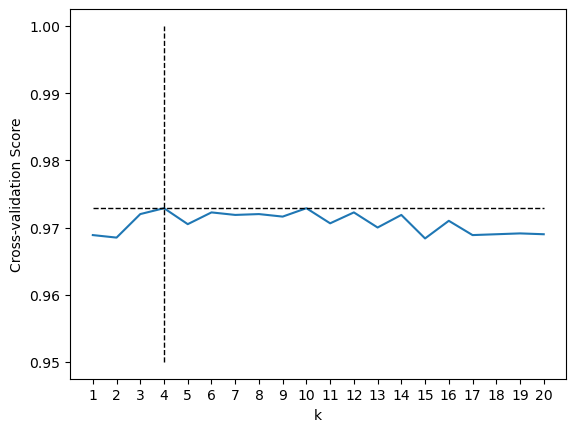

In [76]:
plt.plot(neighbors, neighbors_score, label = "Training Cross-validation Score")
plt.xlabel("k")
plt.xticks(neighbors)
plt.ylabel("Cross-validation Score")
plt.plot([k_opt, k_opt], [0.95, 1], color = "black", linestyle = "--", linewidth = 1)
plt.plot([1, 20], [max_val, max_val], color = "black", linestyle = "--", linewidth = 1)
plt.show()

*It seems the accuracy is best in the training data at k = 4.*

### D3: Code Execution <a name="Code-Execution"></a>

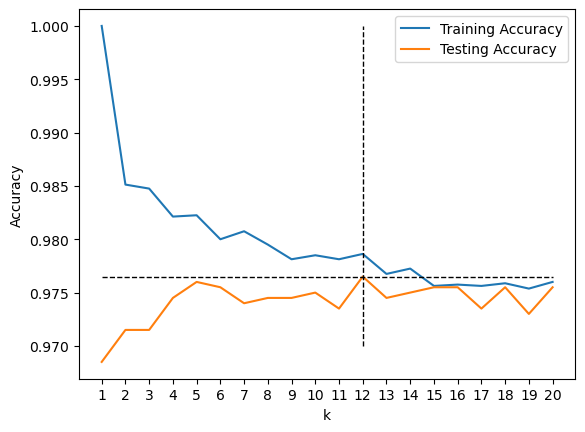

In [77]:
neighbors = np.arange(1, 21)

train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)

    knn.fit(X_train, y_train)

    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.plot(neighbors, train_accuracy, label = "Training Accuracy")
plt.plot(neighbors, test_accuracy, label = "Testing Accuracy")
plt.legend()
plt.xlabel("k")
plt.xticks(neighbors)
plt.ylabel("Accuracy")
plt.plot([12, 12], [0.970, 1], color = "black", linestyle = "--", linewidth = 1)
plt.plot([1, 20], [0.9765, 0.9765], color = "black", linestyle = "--", linewidth = 1)
plt.show()

*It seems the accuracy is best in the training data at k = 12.*

In [78]:
k_opt = 12

# Make a new instance of knn for the optimal k.
knn = KNeighborsClassifier(n_neighbors = k_opt)

# Fit the model with training data.
knn.fit(X_train, y_train)
print("The test accuracy score of the KNN model: " + str(knn.score(X_test, y_test) * 100) + "%")

The test accuracy score of the KNN model: 97.65%


In [79]:
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix:")
print(cm)

Confusion matrix:
[[1243   23]
 [  24  710]]


In [80]:
y_pred_prob = knn.predict_proba(X_test)[:, 1]

print("AUC Score: " + str(roc_auc_score(y_test, y_pred_prob)))

AUC Score: 0.9966063811011961


## Data Summary and Implications <a name="Data-Summary-and-Implications"></a>

### E1: Accuracy and AUC <a name="Accuracy-and-AUC"></a>

**Accuracy**: The accuracy of the model is the ratio of correction predictions of all observations examined. This measures how often the model makes the right prediction for classification. With the accuracy score detailed above, the model has an accuracy of 97.65% meaning that 97.65% of the time, the model correctly predicted the classification based on the predictors, data space and relative algorithm. > 95% is considered a high accuracy, one of the expected outcomes. This indicates that the model performs good when tasked with making a prediction of readmission.

**AUC**: AUC score is evaluation of the model's performance. With an AUC of 0.9966, the model demonstrates great capability in distinguishing between the positive and negative classes across all possible threshold values, this includes true positives, true negatives, false positives and false negatives. The closer the AUC is to 1, the better the model is at predicting true positives while minimizing false positives. In this light, this AUC score complements the accuracy measure and indicates a model that is accurate but also has strong discriminative ability.

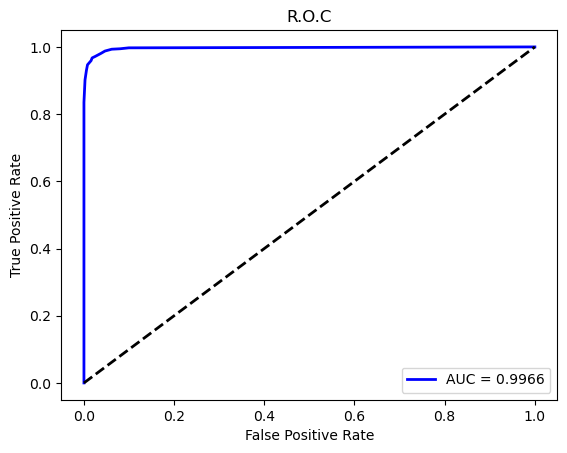

In [81]:
false_pos, true_pos, thres = roc_curve(y_test, y_pred_prob)
roc_auc = auc(false_pos, true_pos)

plt.plot(false_pos, true_pos, color = "blue", lw = 2, label = "AUC = " + str(round(roc_auc_score(y_test, y_pred_prob), 4)))
plt.plot([0, 1], [0, 1], color = "black", lw = 2, linestyle = "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("R.O.C")
plt.legend(loc = "lower right")
plt.show()

### E2: Results and Implications <a name="Results-and-Implications"></a>

**Overall**: The KNN analysis demonstrates an accuracy of 97.65% and an AUC score of approximately 0.9966. This indicates the model is high-performing for the classification of readmission among the features selected. The following is the results and their implications:

**Results**: The analysis demonstrates a high accuracy meaning that it correcly predicts the classification of readmission, true or false, based on the features related to patient daily charge, the number of days a patient, if they had received intravenous or CT scan service, the number of children a patient has and if they were initially admitted via emergency admission. Like the accuracy, the AUC score is also high, meaning that the model is able to distinguish between the classifications with a high confidence. The steep curve of the ROC towards the top left corner indicates a high true positive rate with a low false positive rate.

**Implications**: The model is effective given the current dataset, suggesting that the features, see [Steps for Analysis, Select Features Using SelectKBest from sklearn to Improve Model Efficiency:](#Steps-for-Analysis), are strong in classifying readmission among the features. With the high metrics accuracy and AUC, it is likely that the model would perform well given the scenario of patient fines for excessive readmission. Given the almost perfect AUC score, the results may imply that the model could be robust to slight variations in the data however, it would still be advisable to continuously validate the model against new data to ensure the model's authenticity over time.

### E3: Limitation <a name="Limitation"></a>

**Limitation**: The primary limitation of the analysis is that there exists a presence of class imbalance in the given data set. This imbalance presents only approximately 35% positive instances of readmission, alternatively approximately 65% of cases are not readmitted. While the data set of 10,000 observations is smaller, it is reasonable. The imbalance means that the model is exposed to fewer instances of a true readmission case during training. The disproportion may lead to the model being biased towards predicting non-readmission where it may also compromise the ability to predict true readmission, accurately.

In [82]:
imbalance = df[df.ReAdmis == True].ReAdmis.count()

print("True instances of readmission: " + str(imbalance / 100) + "% of 10,000 records.")
print("False instances of readmission: " + str((10000 - imbalance) / 100) + "% of 10,000 records.")

True instances of readmission: 36.69% of 10,000 records.
False instances of readmission: 63.31% of 10,000 records.


### E4: Course of Action <a name="Course-of-Action"></a>

**Course of Action**: Overall, the recommended course of action following the KNN analysis is listed below, stakeholders are advices to: 

- **Address Class Imbalance**: First, advise work on rebalancing the data set by collecting more data for the instances of a true readmission or, allow for different sampling techniques to help improve the model's ability to predict/classify readmissions more accurately.

- **Continuous Model Evaluation**: Next, attempt to implement procedures or a system in place to monitor the model's performance metrics accuracy and AUC score, over time. If these metrics are to decline, then this would indicate that the model needs reassessment to maintain high performance.

- **Policy Assessment**: Last, review and analyze the current hospital billing and care time policies. This is due to the significant influence of features "TotalCharge" and "Initial_days" in the model. Examining the existing policies may reveal opportunity to adjust the current practices that contribute to readmission.

## Demonstration <a name="Demonstration"></a>

### F: Panopto Recording <a name="Panopto-Recording"></a>

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=3c8412c8-b38f-439b-aa3a-b15f0102b590

### G: Sources for Third-Party Code <a name="Sources-for-Third--Party-Code"></a>

D209 Data Mining 1 Task 1 Cohort PowerPoint (Course Resource)

Pandas. (n.d.). Pandas.DataFrame.query. pandas.DataFrame.query - pandas 2.2.2 documentation. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html 

scikit-learn: Machine Learning in Python. scikit. (n.d.). https://scikit-learn.org/stable/ 

### H: Sources <a name="Sources"></a>

D209 Data Mining 1 Task 1 Cohort PowerPoint (Course Resource)

Grootendorst, M. (2021, December 7). 9 Distance Measures in Data Science. Medium. https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa 

Medical Data Considerations and Dictionary (Course Resource) 

Musolf, A. M., Holzinger, E. R., Malley, J. D., & Bailey-Wilson, J. E. (2021, December 4). What makes a good prediction? Feature importance and beginning to open the black box of machine learning in genetics. National Library of Medicine. https://pubmed.ncbi.nlm.nih.gov/34862561/ 

Straw, E. (2024, July). Dr. Straw’s Tips for Success in D209. Western Governors University.